In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import json
from pandas.io.json import json_normalize
import geopandas as gpd

### List of Parks Properties
This dataset identifies City property under the jurisdiction of NYC Parks, which may be managed partially or solely by the Agency.

In [5]:
shapefile = "C:/Users/omhai/OneDrive/Desktop/Shetty/Hackathon/Greenspaces/List of Parks Properties\geo_export_6f002976-9014-46e5-a352-01be4f635989.shp"

# Read the shapefile
gdf = gpd.read_file(shapefile)

# View the first 5 records of the data
gdf.head()

,acquisitio,acres,address,borough,class,commission,communityb,councildis,department,eapply,...,precinct,retired,signname,subcategor,typecatego,url,us_congres,waterfront,zipcode,geometry
0,19990222000000.00000,20.907,None,R,PARK,20100106000000.00000,503,51,R-03,Seaside Wildlife Nature Park,...,122,False,Seaside Wildlife Nature Park,Neighborhood Park,Neighborhood Park,http://www.nycgovparks.org/parks/R145/,11,Yes,10308,"MULTIPOLYGON (((-74.14227 40.54220, -74.14218 ..."
1,19530514000000.00000,0.061,None,Q,PARK,20090423000000.00000,401,22,Q-01,Strippoli Square,...,114,False,Strippoli Square,Sitting Area/Triangle/Mall,Triangle/Plaza,http://www.nycgovparks.org/parks/Q355/,14,No,11377,"POLYGON ((-73.90749 40.75709, -73.90768 40.757..."
2,19400528000000.00000,1.130,150 34 STREET,B,PARK,20100106000000.00000,307,38,B-07,D'Eemic Playground,...,72,False,D'Emic Playground,Neighborhood Plgd,Playground,http://www.nycgovparks.org/parks/B210B/,7,No,11232,"POLYGON ((-74.00468 40.65584, -74.00492 40.655..."
3,20100517000000.00000,2.160,201/125 BOLTON AVENUE,X,PARK,20100106000000.00000,209,18,X-09,Harding Park,...,43,False,Harding Park,Neighborhood Plgd,Neighborhood Park,http://www.nycgovparks.org/parks/X262/,15,No,10473,"MULTIPOLYGON (((-73.85640 40.80925, -73.85676 ..."
4,19550427000000.00000,1.104,4522 CARPENTER AVENUE,X,PARK,20100106000000.00000,212,11,X-12,Wakefield Playground,...,47,False,Wakefield Playground,JOP,Jointly Operated Playground,http://www.nycgovparks.org/parks/X188/,16,No,10470,"MULTIPOLYGON (((-73.85416 40.90187, -73.85455 ..."


In [6]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2015 entries, 0 to 2014
Data columns (total 36 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   acquisitio  1929 non-null   object  
 1   acres       2015 non-null   float64 
 2   address     1080 non-null   object  
 3   borough     2015 non-null   object  
 4   class       2015 non-null   object  
 5   commission  1834 non-null   object  
 6   communityb  2015 non-null   object  
 7   councildis  2014 non-null   object  
 8   department  2015 non-null   object  
 9   eapply      1936 non-null   object  
 10  gisobjid    2015 non-null   float64 
 11  gispropnum  2015 non-null   object  
 12  global_id   2015 non-null   object  
 13  jurisdicti  2015 non-null   object  
 14  location    2015 non-null   object  
 15  mapped      2009 non-null   object  
 16  name311     2014 non-null   object  
 17  nys_assemb  2015 non-null   object  
 18  nys_senate  2014 non-null   object  
 19

In [22]:
gdf['mapped'].value_counts()

False    1137
True      784
Part       78
Unkwn       8
TRUE        1
No          1
Name: mapped, dtype: int64

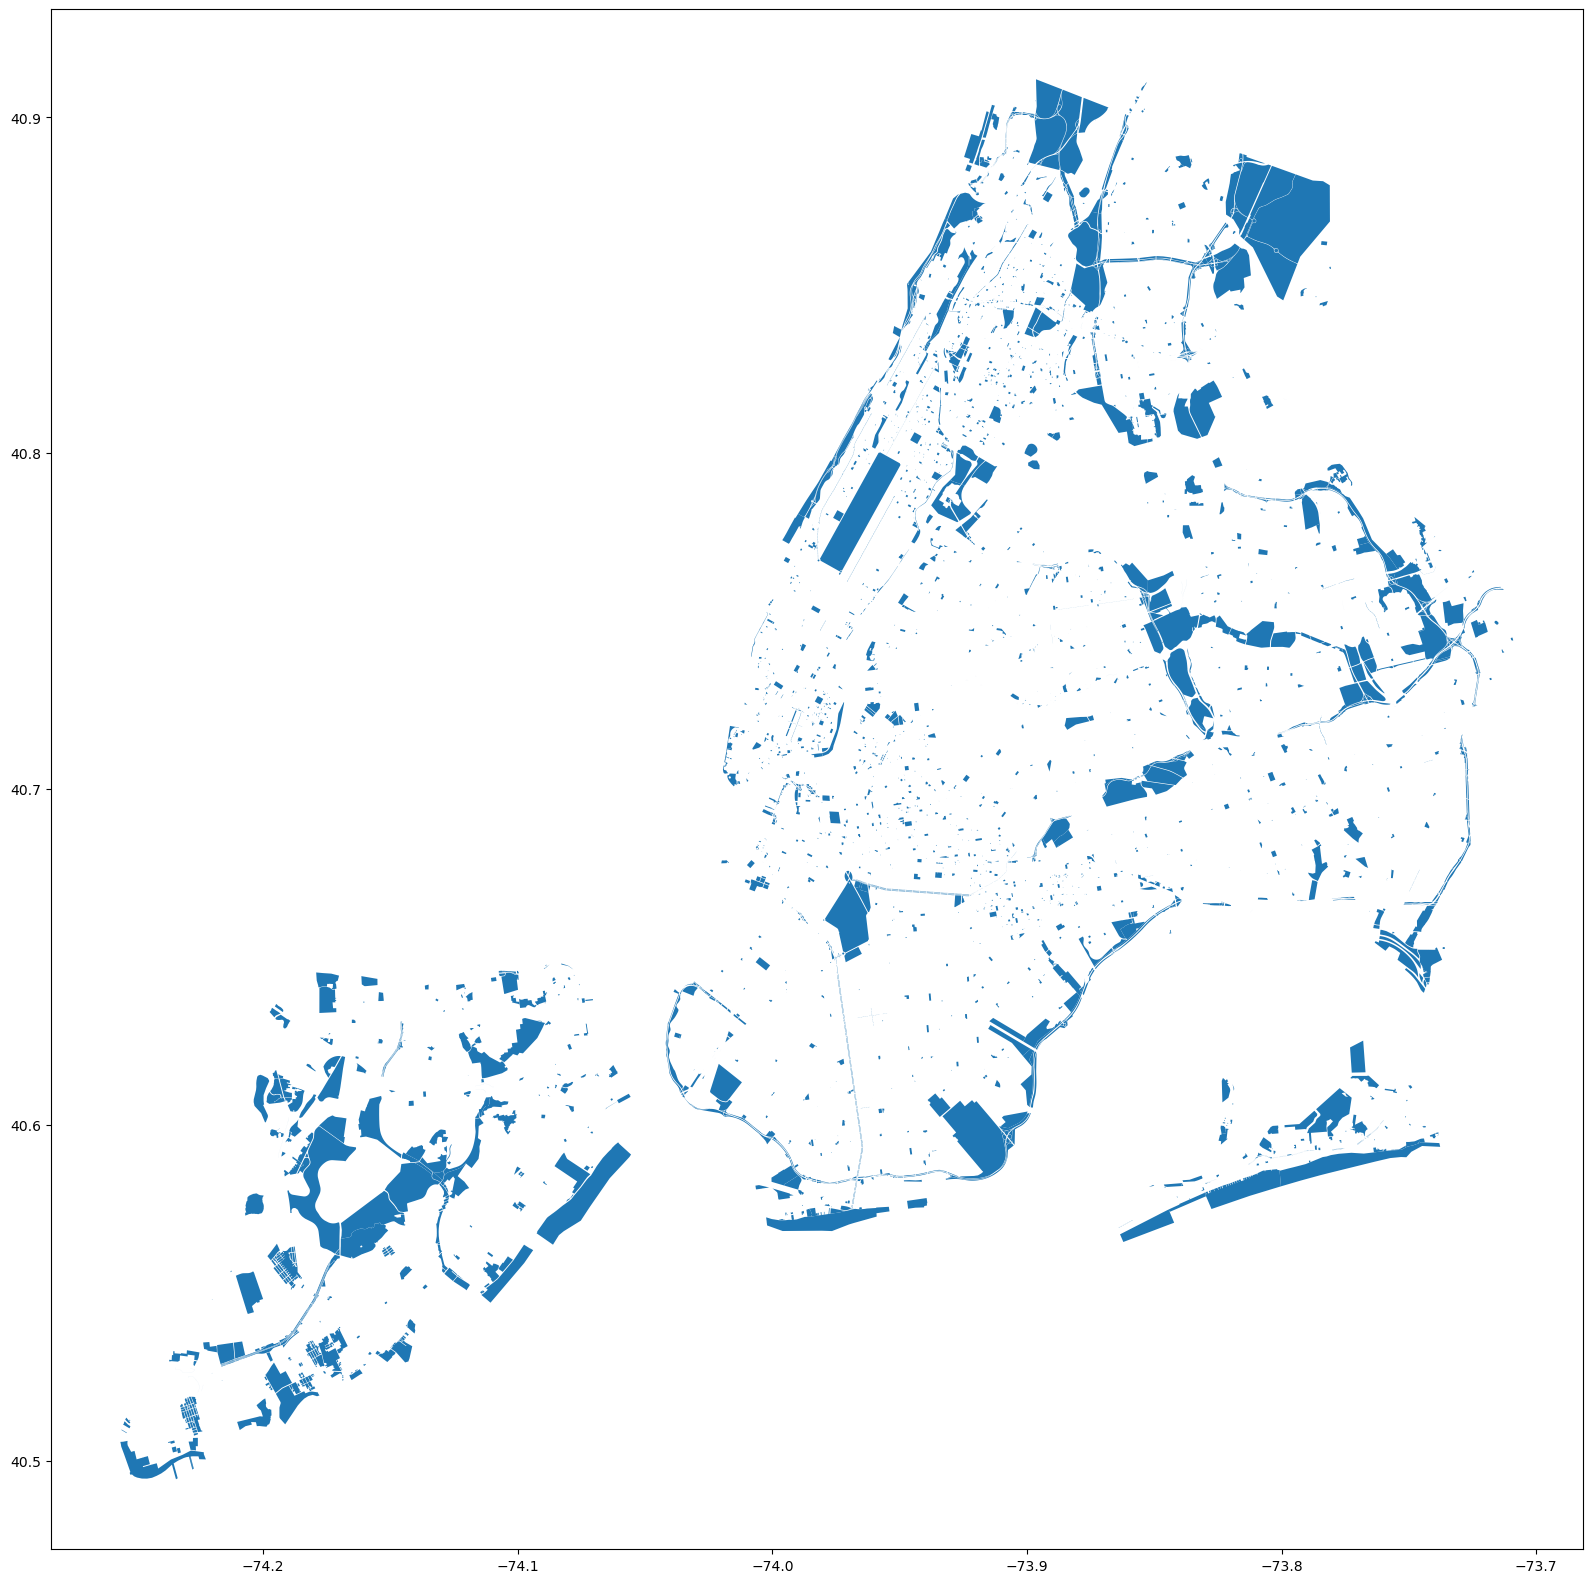

In [9]:
gdf.plot(figsize=(20,20))
plt.show()

### Parks Inspection Program – Inspections
This dataset contains overall ratings associated with property inspections. Each row represents an individual inspection.

In [12]:
pip = pd.read_csv("C:/Users/omhai/OneDrive/Desktop/Shetty/Hackathon/Greenspaces/Park Inspections/Parks_Inspection_Program___Inspections.csv")
pip.head()

,Prop ID,AMPSDistrict,Inspection ID,Season,Round,Date,BeginInspection,EndInspection,Inspection Year,inspector,inspector2,Overall Condition,Cleanliness,Safety Condition,Structural Condition,VisitorCount,Closed?,Comments,InspectionType,inspAddedDate
0,X028,04,135710,Summer,3,07/15/2020 12:00:00 AM,03:00 PM,03:50 PM,2020,50,NaN,U,U,NaN,NaN,94.0,NaN,Litter measurement shots not provided due to C...,PIP,07/15/2020 06:55:00 PM
1,M010-241,13,135716,Summer,4,07/16/2020 12:00:00 AM,11:30 AM,11:59 AM,2020,50,NaN,A,A,NaN,NaN,13.0,NaN,NaN,PIP,07/16/2020 01:37:00 PM
2,Q104-02,01,135720,Summer,4,07/16/2020 12:00:00 AM,10:22 AM,10:37 AM,2020,32,NaN,U,U,NaN,NaN,NaN,NaN,NaN,PIP,07/16/2020 02:13:00 PM
3,X196,12,135735,Summer,4,07/17/2020 12:00:00 AM,08:34 AM,09:16 AM,2020,32,NaN,A,A,NaN,NaN,NaN,NaN,NaN,PIP,07/17/2020 01:42:00 PM
4,B073-ZN05,19,135743,Summer,4,07/17/2020 12:00:00 AM,01:00 PM,01:45 PM,2020,50,NaN,A,A,NaN,NaN,55.0,NaN,NaN,PIP,07/17/2020 03:14:00 PM


### Mapped

In [18]:
mapped = gpd.read_file('C:/Users/omhai/OneDrive/Desktop/Shetty/Hackathon/Greenspaces/Mapped Sites/Parks Inspection Program   All Sites (MAPPED).geojson')

mapped.head()

,comfortstation,prop_id,jurisdiction,zipcode,acres,sub_category,prop_name,propnum,site_location,communityboard,...,nyssenate,prop_location,uscongress,nysassembly,boro,category,rated,ampsdistrict,council_district,geometry
0,No,B210T,DPR,11209,0.00400000,EXWY,Park,B210T,N/B Gowanus Exwy. bet. 85 St. and 86 St.,310,...,22,N/B Gowanus Exwy. bet. 85 St. and 86 St.,11,46,B,Other,No,10,43,"MULTIPOLYGON (((-74.02263 40.61963, -74.02252 ..."
1,No,B210S,DPR,11209,0.00400000,EXWY,Park,B210S,S/B Gowanus Exwy. bet. 85 St. and 86 St.,310,...,22,S/B Gowanus Exwy. bet. 85 St. and 86 St.,11,46,B,Other,No,10,43,"MULTIPOLYGON (((-74.02328 40.62040, -74.02328 ..."
2,No,B210R,DPR,11209,0.00400000,EXWY,Park,B210R,S/B Gowanus Exwy. bet. 84 St. and 85 St.,310,...,22,S/B Gowanus Exwy. bet. 84 St. and 85 St.,11,46,B,Other,No,10,43,"MULTIPOLYGON (((-74.02278 40.62099, -74.02266 ..."
3,No,B210Q-BZ562,DOT,11209,0.10400000,Type 1,Coffey Square,B210Q-BZ562,"Ft Hamilton Pkwy, 7th Ave, and 81st St",310,...,22,"Ft Hamilton Pkwy, 7th Ave, and 81st St",11,46,B,Greenstreet,No,10,43,"MULTIPOLYGON (((-74.01966 40.62240, -74.01960 ..."
4,No,B210Q,DPR,"11209, 11228",0.00400000,Type 2,Park,B210Q,N/B Gowanus Exwy. bet. 81 St. and 82 St.,310,...,22,N/B Gowanus Exwy. bet. 81 St. and 82 St.,11,46,B,Greenstreet,No,10,43,"MULTIPOLYGON (((-74.02043 40.62214, -74.02041 ..."


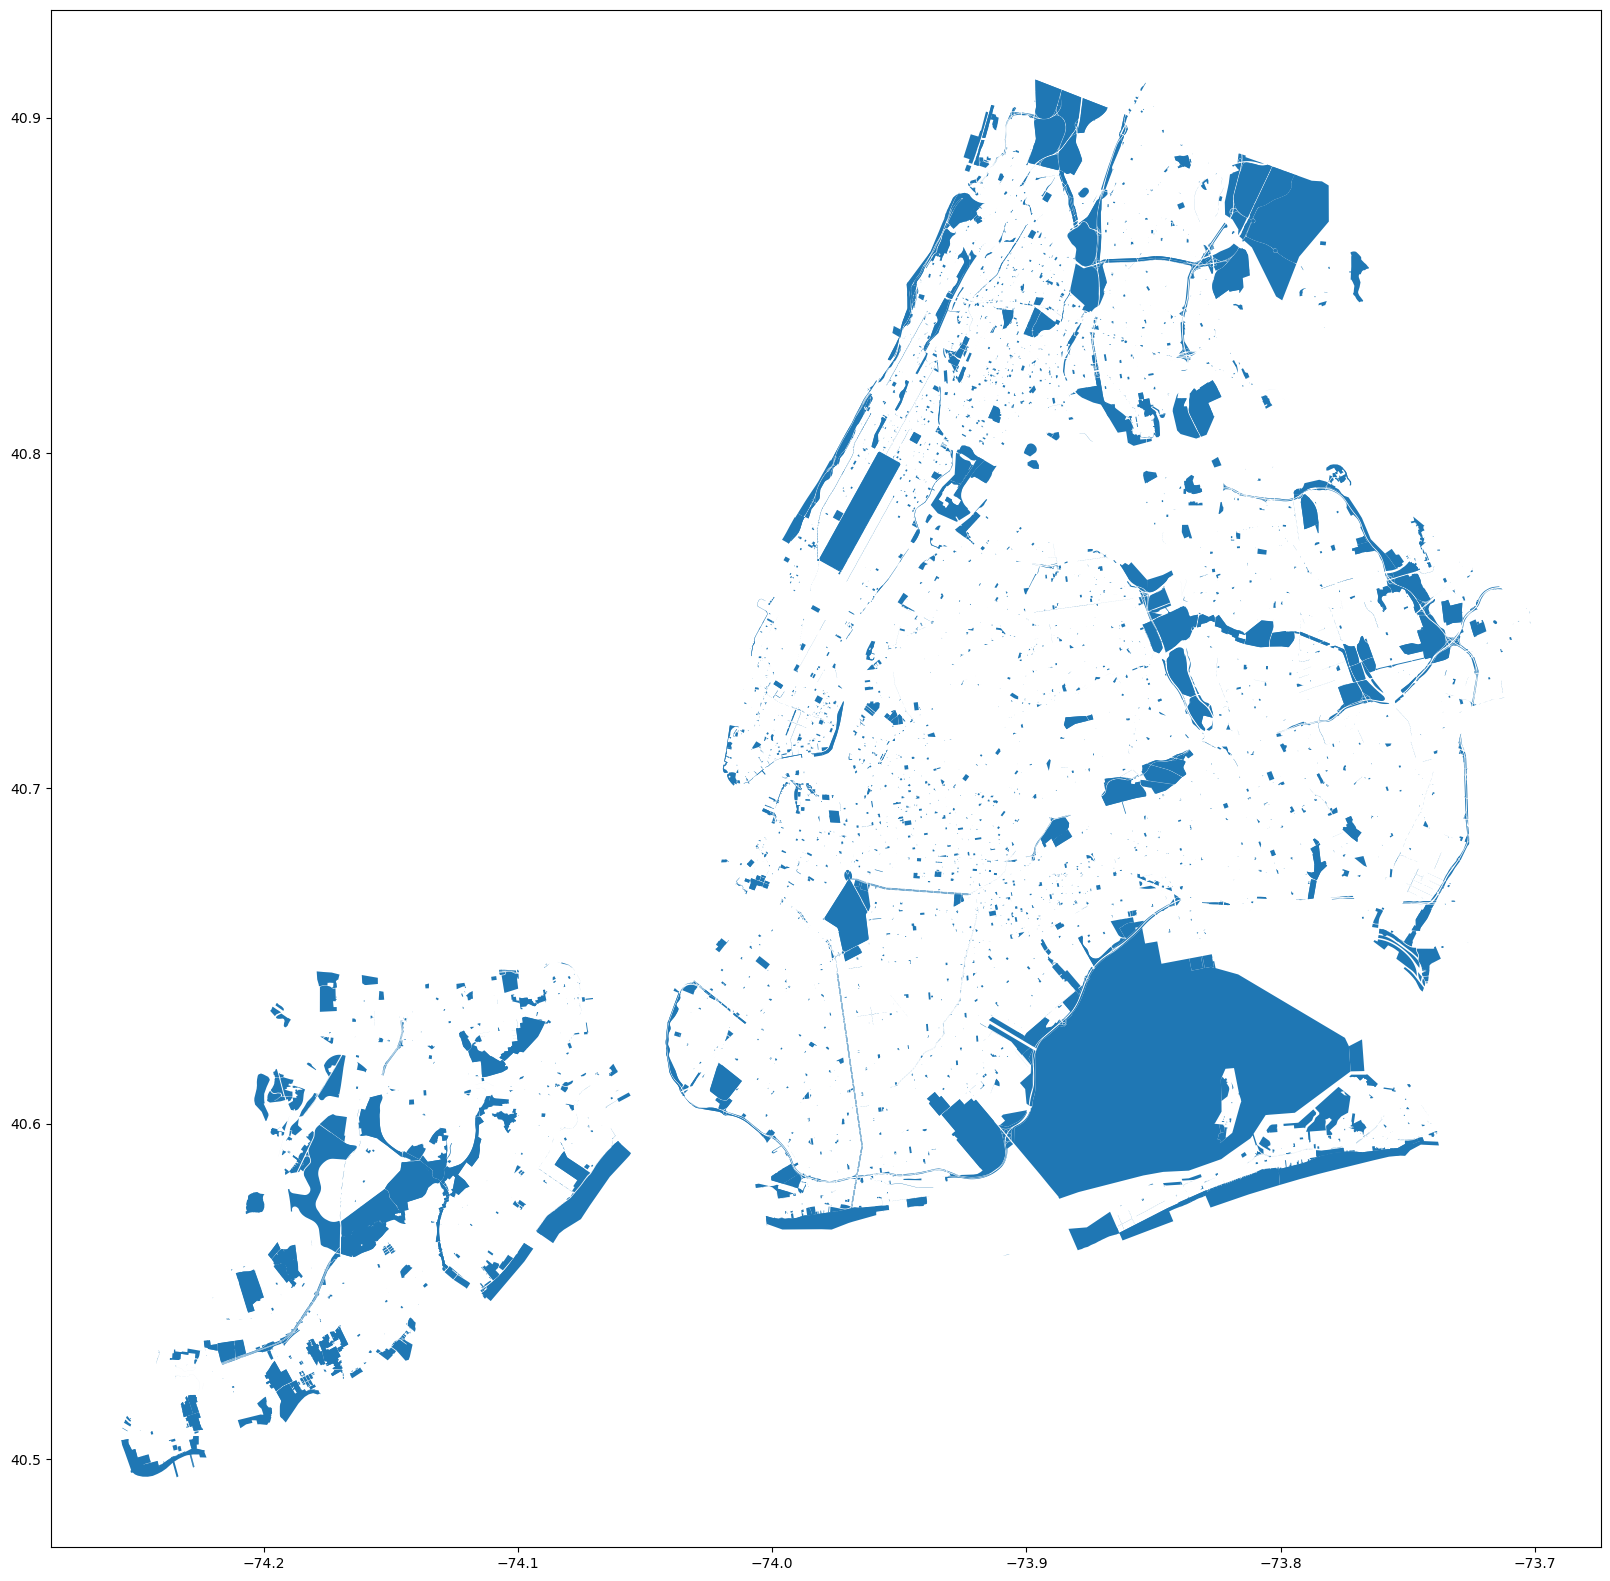

In [19]:
mapped.plot(figsize=(20,20))
plt.show()

with open("C:/Users/omhai/OneDrive/Desktop/Shetty/Hackathon/Greenspaces/Mapped Sites/Parks Inspection Program   All Sites (MAPPED).geojson", 'r') as f:
    mapped = json.load(f)

mapped = json_normalize(mapped['features'])
mapped.head()

In [23]:
mapped.shape

(6313, 26)

### Unmapped

In [24]:
unmapped = pd.read_csv("C:/Users/omhai/OneDrive/Desktop/Shetty/Hackathon/Greenspaces/Unmapped_Sites/Parks_Inspection_Program_-_All_Sites__UNMAPPED_.csv")
unmapped.head()

,PropNum,Prop ID,Boro,AMPSDistrict,Prop Name,Site Name,Prop Location,Site Location,Acres,Category,...,Council District,ZipCode,COMMUNITYBOARD,Jurisdiction,NYSAssembly,NYSSenate,USCongress,Precinct,ComfortStation,SourceFC
0,B080B,B080B,B,13,WILLIAM J HENNESSY TRIANGLE,WILLIAM J HENNESSY TRIANGLE,S/S OCEAN PKWY & SEA BREEZE AVE & SURF AVE,S/S OCEAN PKWY & SEA BREEZE AVE & SURF AVE,0.0,Greenstreet,...,NaN,NaN,NaN,DPR,NaN,NaN,NaN,NaN,False,Unmapped
1,B169,B169-ZN01,B,13,Coney Island Beach & Boardwalk,CONEY ISLAND BEACH ZONE 1,"Corbin Pl. to W. 37 St., Boardwalk",CORBIN PL TO CONEY ISLAND AVE,0.0,Large Park,...,NaN,NaN,NaN,DPR,NaN,NaN,NaN,NaN,False,Unmapped
2,B169,B169-ZN02,B,13,Coney Island Beach & Boardwalk,CONEY ISLAND BEACH ZONE 2,"Corbin Pl. to W. 37 St., Boardwalk",CONEY ISLAND AVE TO B. 2ND ST,0.0,Large Park,...,NaN,NaN,NaN,DPR,NaN,NaN,NaN,NaN,False,Unmapped
3,B169,B169-ZN03,B,13,Coney Island Beach & Boardwalk,CONEY ISLAND BEACH ZONE 3,"Corbin Pl. to W. 37 St., Boardwalk",B. 2ND ST TO W 2ND ST,0.0,Large Park,...,NaN,NaN,NaN,DPR,NaN,NaN,NaN,NaN,False,Unmapped
4,B169,B169-ZN04,B,13,Coney Island Beach & Boardwalk,CONEY ISLAND BEACH ZONE 4,"Corbin Pl. to W. 37 St., Boardwalk",W 2ND ST TO W 10TH ST,0.0,Large Park,...,NaN,NaN,NaN,DPR,NaN,NaN,NaN,NaN,False,Unmapped


In [25]:
unmapped.shape

(178, 23)